# Î™©Ìëú

1. Abstractive Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Îã®Í≥ÑÍ∞Ä Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.	Î∂ÑÏÑùÎã®Í≥Ñ, Ï†ïÏ†úÎã®Í≥Ñ, Ï†ïÍ∑úÌôîÏôÄ Î∂àÏö©Ïñ¥ Ï†úÍ±∞, Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨, Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏù¥ Îπ†ÏßêÏóÜÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.

2. ÌÖçÏä§Ìä∏ ÏöîÏïΩÎ™®Îç∏Ïù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÌïôÏäµÎêòÏóàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§. Î™®Îç∏ ÌïôÏäµÏù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú train lossÏôÄ validation lossÍ∞Ä Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•ÏùÑ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ ÌôïÏù∏ÌñàÏúºÎ©∞, Ïã§Ï†ú ÏöîÏïΩÎ¨∏Ïóê ÏûàÎäî ÌïµÏã¨ Îã®Ïñ¥Îì§Ïù¥ ÏöîÏïΩ Î¨∏Ïû• ÏïàÏóê Ìè¨Ìï®ÎêòÏóàÎã§.

3. Extractive ÏöîÏïΩÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í≥† Abstractive ÏöîÏïΩ Í≤∞Í≥ºÍ≥º Ìï®Íªò ÎπÑÍµêÌï¥ Î≥¥ÏïòÎã§.	Îëê ÏöîÏïΩ Í≤∞Í≥ºÎ•º Î¨∏Î≤ïÏôÑÏÑ±ÎèÑ Ï∏°Î©¥Í≥º ÌïµÏã¨Îã®Ïñ¥ Ìè¨Ìï® Ï∏°Î©¥ÏúºÎ°ú ÎÇòÎàÑÏñ¥ ÎπÑÍµêÌïòÍ≥† Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌëúÎ°ú Ï†ïÎ¶¨ÌïòÏó¨ Ï†úÏãúÌïòÏòÄÎã§. 


In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/Untitled Folder 4/news_summary_more.csv", nrows=100000)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98401


In [3]:
data.head()

headlines  \
0  upGrad learner switches to career in ML & Al w...   
1  Delhi techie wins free food from Swiggy for on...   
2  New Zealand end Rohit Sharma-led India's 12-ma...   
3  Aegon life iTerm insurance plan helps customer...   
4  Have known Hirani for yrs, what if MeToo claim...   

                                                text  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1  Kunal Shah's credit card bill payment platform...  
2  New Zealand defeated India by 8 wickets in the...  
3  With Aegon Life iTerm Insurance plan, customer...  
4  Speaking about the sexual harassment allegatio...

In [4]:
print('Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['text'].nunique())
print('Summary Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['headlines'].nunique())

Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98360
Summary Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98280


In [5]:
data.drop_duplicates(subset = ['text'], inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


textÎßå Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìï¥Ï£ºÎäî Ïù¥Ïú†Îäî headlines ÏóêÏÑú Í∞ÑÎã®ÌïòÍ≤å ÌïòÎäî Í≤ΩÏö∞ Í≤πÏπ†ÏàòÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.

In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò: ", len(contractions))

Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò:  120


In [8]:
print('Î∂àÏö©Ïñ¥ Í∞úÏàò :', len(stopwords.words('english') ))
print(stopwords.words('english'))

Î∂àÏö©Ïñ¥ Í∞úÏàò : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

In [9]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # ÌÖçÏä§Ìä∏ ÏÜåÎ¨∏ÏûêÌôî
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> Îì±Ïùò html ÌÉúÍ∑∏ Ï†úÍ±∞
    sentence = re.sub(r'\([^)]*\)', '', sentence) # Í¥ÑÌò∏Î°ú Îã´Ìûå Î¨∏ÏûêÏó¥ (...) Ï†úÍ±∞ Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # ÏåçÎî∞Ïò¥Ìëú " Ï†úÍ±∞
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # ÏïΩÏñ¥ Ï†ïÍ∑úÌôî
    sentence = re.sub(r"'s\b","", sentence) # ÏÜåÏú†Í≤© Ï†úÍ±∞. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # ÏòÅÏñ¥ Ïô∏ Î¨∏Ïûê(Ïà´Ïûê, ÌäπÏàòÎ¨∏Ïûê Îì±) Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
    sentence = re.sub('[m]{2,}', 'mm', sentence) # mÏù¥ 3Í∞ú Ïù¥ÏÉÅÏù¥Î©¥ 2Í∞úÎ°ú Î≥ÄÍ≤Ω. Ex) ummmmmmm yeah -> umm yeah
    
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # Î∂àÏö©Ïñ¥ ÎØ∏Ï†úÍ±∞ (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [10]:
clean_text = []

clean_text = [preprocess_sentence(text) for text in data['text']]

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï∂úÎ†•
print("Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º: ", clean_text[:5])

Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers o

In [11]:
clean_summary = []

clean_summary = [preprocess_sentence(text) for text in data['headlines']]

# Ï†ÑÏ≤òÎ¶¨ ÌõÑ Ï∂úÎ†•
print("Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º: ", clean_text[:5])

Text Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Í≥º:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers o

In [12]:
data['text'] = clean_text
data['headlines'] = clean_summary

# Îπà Í∞íÏùÑ Null Í∞íÏúºÎ°ú Î≥ÄÌôò
data.replace('', np.nan, inplace=True)


In [13]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 60
ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 35.09968483123221
ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 13
ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 7.136183407889386


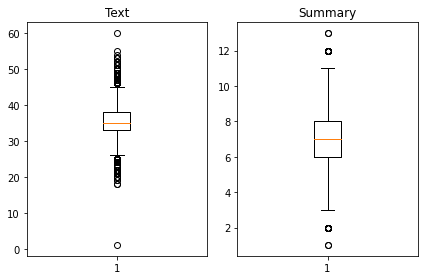

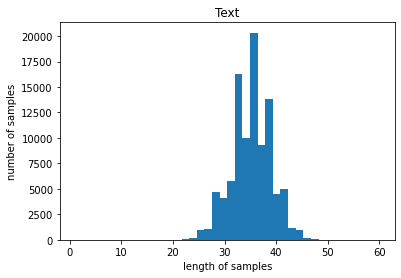

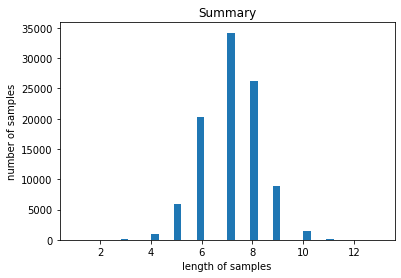

In [15]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(text_len)))
print('ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(summary_len)))
print('ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(summary_len)))
print('ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
text_max_len = 50
summary_max_len = 12

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (cnt / len(nested_list))))

In [17]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 50 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.9998576657177715
Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 12 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.9999796665311103


In [18]:
data = data[data['text'].str.split().str.len() <= text_max_len]

data = data[data['headlines'].str.split().str.len() <= summary_max_len]

In [19]:
#ÌÜ†ÌÅ∞Ìôî

data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

encoder_input = np.array(data['text']) # Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•
decoder_input = np.array(data['decoder_input']) # ÎîîÏΩîÎçîÏùò ÏûÖÎ†•
decoder_target = np.array(data['decoder_target']) # ÎîîÏΩîÎçîÏùò Î†àÏù¥Î∏î


In [20]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[88050 98340 38787 ... 61404 22129 19895]


In [21]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
n_of_val = int(len(encoder_input)*0.2)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò :', n_of_val)

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò : 19668


In [22]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 78676
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 78676
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 19668
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 19668


In [23]:
#ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä

src_tokenizer = Tokenizer() # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ïÏùò
src_tokenizer.fit_on_texts(encoder_input_train) # ÏûÖÎ†•Îêú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Îã®Ïñ¥ ÏßëÌï© ÏÉùÏÑ±

threshold = 7
total_cnt = len(src_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)


Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 69811
Îì±Ïû• ÎπàÎèÑÍ∞Ä 6Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 47680
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 22131
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 68.2986921831803
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 3.5043361497423806


In [24]:
src_vocab = 22214 # 69569-47355Î°ú Í∞úÏàòÎ•º Ï†ïÌñàÏäµÎãàÎã§.
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train) # Îã®Ïñ¥ ÏßëÌï© Ïû¨ÏÉùÏÑ±

In [25]:
# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# Ïûò ÏßÑÌñâÎêòÏóàÎäîÏßÄ ÏÉòÌîå Ï∂úÎ†•
print(encoder_input_train[:3])

[[79, 3644, 2287, 420, 1240, 12247, 1268, 7766, 1249, 2490, 76, 184, 8130, 278, 941, 8130, 278, 941, 47, 468, 229, 61, 1022, 278, 18393, 194, 1840, 18393, 719, 32, 2287, 12247, 2126], [5870, 7, 408, 3645, 1242, 573, 174, 2949, 15, 11568, 169, 408, 2966, 18394, 20675, 6808, 9472, 1909, 3033, 2429, 19437, 3645, 159, 3353, 444, 1009, 2886, 15, 248, 15, 401, 214, 402], [27, 828, 15335, 9309, 261, 2227, 2, 70, 40, 584, 63, 1, 4819, 4980, 1939, 2150, 246, 299, 400, 3491, 1826, 2150, 117, 4189, 4, 3, 13, 1895, 1573, 2430, 1362, 703, 70]]


In [26]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [27]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 29880
Îì±Ïû• ÎπàÎèÑÍ∞Ä 5Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 19611
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 10269
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 65.63253012048193
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 5.876095245980258


In [28]:
tar_vocab = 29949-19628 #
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# Ïûò Î≥ÄÌôòÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1915, 302, 38, 6712, 650, 1486, 36], [1, 22, 279, 2059, 1682, 9413, 6038, 5279], [1, 771, 1041, 53, 330], [1, 1230, 75, 559, 5, 2487, 5756, 85, 581], [1, 40, 207, 224, 7, 535, 10271]]
target
decoder  [[1915, 302, 38, 6712, 650, 1486, 36, 2], [22, 279, 2059, 1682, 9413, 6038, 5279, 2], [771, 1041, 53, 330, 2], [1230, 75, 559, 5, 2487, 5756, 85, 581, 2], [40, 207, 224, 7, 535, 10271, 2]]


In [29]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_train))
print('ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 2
ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 1
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 78674
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 78674
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 19667
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 19667


In [30]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate, Dropout
from tensorflow.keras.models import Model

# Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
embedding_dim = 128  # ÏûÑÎ≤†Îî© Ï∞®Ïõê
hidden_units = 256  # LSTM hidden state ÌÅ¨Í∏∞
max_text_len = 50  # ÏõêÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥
max_summary_len = 12  # ÏöîÏïΩÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥

# Ïù∏ÏΩîÎçî (1Ï∏µ LSTM)
encoder_inputs = Input(shape=(max_text_len,))
encoder_embedding = Embedding(input_dim=src_vocab, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.3)  # LSTM Ï∏µÏùÑ 1Í∞úÎßå ÏÇ¨Ïö©
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# ÎîîÏΩîÎçî (1Ï∏µ LSTM)
decoder_inputs = Input(shape=(max_summary_len,))
decoder_embedding = Embedding(input_dim=tar_vocab, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.3)  # LSTM Ï∏µÏùÑ 1Í∞úÎßå ÏÇ¨Ïö©
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# Ïñ¥ÌÖêÏÖò (Attention)
attention_layer = Attention()
attention_result = attention_layer([decoder_outputs, encoder_outputs])  # ÎîîÏΩîÎçîÍ∞Ä Ïù∏ÏΩîÎçîÏùò Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏùÑ ÏßëÏ§ë

# Ïñ¥ÌÖêÏÖò Í≤∞Ìï©
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_result])
decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# Î™®Îç∏ ÏÉùÏÑ±
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()

from tensorflow.keras.callbacks import EarlyStopping



In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 128  # ÏûÑÎ≤†Îî© Ï∞®Ïõê
hidden_units = 256  # LSTM hidden state ÌÅ¨Í∏∞
max_text_len = 50  # ÏõêÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥
max_summary_len = 12  # ÏöîÏïΩÎ¨∏ ÏµúÎåÄ Í∏∏Ïù¥

# 1Ô∏è‚É£ Ïù∏ÏΩîÎçî (1Ï∏µ LSTM)
encoder_inputs = Input(shape=(max_text_len,))
encoder_embedding = Embedding(input_dim=src_vocab, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)  # Dropout Ï§ÑÏù¥Í∏∞
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# 2Ô∏è‚É£ ÎîîÏΩîÎçî (1Ï∏µ LSTM)
decoder_inputs = Input(shape=(max_summary_len,))
decoder_embedding = Embedding(input_dim=tar_vocab, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, dropout=0.2)  # Dropout Ï§ÑÏù¥Í∏∞
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

# 3Ô∏è‚É£ Ïñ¥ÌÖêÏÖò (Attention)
attention_layer = Attention()
attention_result = attention_layer([decoder_outputs, encoder_outputs])  # Ïñ¥ÌÖêÏÖò Ï†ÅÏö©

# 4Ô∏è‚É£ Ïñ¥ÌÖêÏÖò Í≤∞Ìï©
decoder_concat = Concatenate(axis=-1)([decoder_outputs, attention_result])
decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

# 5Ô∏è‚É£ Î™®Îç∏ ÏÉùÏÑ±
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 6Ô∏è‚É£ Î™®Îç∏ Ïª¥ÌååÏùº (Adam ÏÇ¨Ïö©)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# 7Ô∏è‚É£ Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      2843392     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 12, 128)      1321088     input_2[0][0]                    
______________________________________________________________________________________________

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# 
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

# Î∞∞Ïπò ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞ 
history = model.fit(
    x=[encoder_input_train, decoder_input_train], 
    y=decoder_target_train,
    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size=256,  
    callbacks=[es], 
    epochs=50  
)

Epoch 1/50
308/308 [==============================] - 17s 54ms/step - loss: 3.5490 - val_loss: 3.4868
Epoch 5/50
308/308 [==============================] - 17s 54ms/step - loss: 3.2465 - val_loss: 3.3134
Epoch 6/50
308/308 [==============================] - 17s 55ms/step - loss: 2.9897 - val_loss: 3.1861
Epoch 7/50
308/308 [==============================] - 17s 56ms/step - loss: 2.7678 - val_loss: 3.0998
Epoch 8/50
308/308 [==============================] - 17s 56ms/step - loss: 2.5723 - val_loss: 3.0355
Epoch 9/50
308/308 [==============================] - 17s 57ms/step - loss: 2.3973 - val_loss: 2.9949
Epoch 10/50
308/308 [==============================] - 18s 57ms/step - loss: 2.2420 - val_loss: 2.9663
Epoch 11/50
308/308 [==============================] - 17s 57ms/step - loss: 2.1008 - val_loss: 2.9574
Epoch 12/50
308/308 [==============================] - 17s 57ms/step - loss: 1.9730 - val_loss: 2.9474
Epoch 13/50
308/308 [==============================] - 17s 57ms/step - loss: 1.

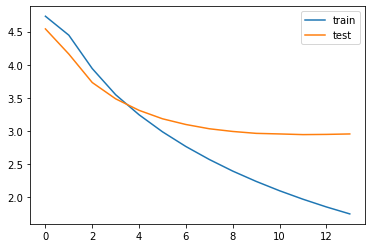

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
src_index_to_word = src_tokenizer.index_word # ÏõêÎ¨∏ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå
tar_word_to_index = tar_tokenizer.word_index # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Îã®Ïñ¥ -> Ï†ïÏàòÎ•º ÏñªÏùå
tar_index_to_word = tar_tokenizer.index_word # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå

In [45]:
# Ïù∏ÏΩîÎçî ÏÑ§Í≥Ñ
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

hidden_size=256

# Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏÉÅÌÉúÎì§ÏùÑ Ï†ÄÏû•ÌïòÎäî ÌÖêÏÑú
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = decoder_embedding(decoder_inputs)

# Î¨∏Ïû•Ïùò Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï¥àÍ∏∞ ÏÉÅÌÉú(initial_state)Î•º Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏÉÅÌÉúÎ°ú ÏÇ¨Ïö©. Ïù¥Îäî Îí§Ïùò Ìï®Ïàò decode_sequence()Ïóê Íµ¨ÌòÑ
# ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑúÏôÄ Îã¨Î¶¨ LSTMÏùò Î¶¨ÌÑ¥ÌïòÎäî ÏùÄÎãâ ÏÉÅÌÉúÏôÄ ÏÖÄ ÏÉÅÌÉúÏù∏ state_hÏôÄ state_cÎ•º Î≤ÑÎ¶¨ÏßÄ ÏïäÏùå.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

TypeError: 'KerasTensor' object is not callable

In [44]:
# Ïñ¥ÌÖêÏÖò Ìï®Ïàò
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# ÎîîÏΩîÎçîÏùò Ï∂úÎ†•Ï∏µ
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# ÏµúÏ¢Ö ÎîîÏΩîÎçî Î™®Îç∏
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

NameError: name 'attn_layer' is not defined

In [39]:
def decode_sequence(input_seq):
    # ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ Ïù∏ÏΩîÎçîÏùò ÏÉÅÌÉúÎ•º ÏñªÏùå
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>Ïóê Ìï¥ÎãπÌïòÎäî ÌÜ†ÌÅ∞ ÏÉùÏÑ±
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_conditionÏù¥ TrueÍ∞Ä Îê† ÎïåÍπåÏßÄ Î£®ÌîÑ Î∞òÎ≥µ

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>Ïóê ÎèÑÎã¨ÌïòÍ±∞ÎÇò ÏµúÎåÄ Í∏∏Ïù¥Î•º ÎÑòÏúºÎ©¥ Ï§ëÎã®.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # Í∏∏Ïù¥Í∞Ä 1Ïù∏ ÌÉÄÍ≤ü ÏãúÌÄÄÏä§Î•º ÏóÖÎç∞Ïù¥Ìä∏
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # ÏÉÅÌÉúÎ•º ÏóÖÎç∞Ïù¥Ìä∏ Ìï©ÎãàÎã§.
        e_h, e_c = h, c

    return decoded_sentence

In [40]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [41]:
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if (i != 0 and i != tar_word_to_index['sostoken'] and i != tar_word_to_index['eostoken']):  # SOS, EOS Ï†úÍ±∞
            temp = temp + tar_index_to_word[i] + ' '
    return temp.strip()  

In [42]:
for i in range(50, 100):
    print("ÏõêÎ¨∏ :", seq2text(encoder_input_test[i]))
    print("Ïã§Ï†ú ÏöîÏïΩ :", seq2summary(decoder_input_test[i]))
    print("ÏòàÏ∏° ÏöîÏïΩ :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

ÏõêÎ¨∏ : filmmaker subhash ghai whose film completed years sunday said idea guy aishwarya rai song actor shahid kapoor wanted good looking boy asked added subhash said know going become big star 
Ïã§Ï†ú ÏöîÏïΩ : guy aish shahid kapoor subhash ghai


NameError: name 'decoder_model' is not defined

In [46]:
import random
from summa.summarizer import summarize

# ÎûúÎç§Ìïú ÏÉòÌîå ÏÑ†ÌÉù
sample_idx = random.randint(0, len(encoder_input_test) - 1)
sample_text = seq2text(encoder_input_test[sample_idx])  # ÏõêÎ¨∏ Î≥ÄÌôò

#  Ï∂îÏ∂úÏ†Å ÏöîÏïΩ ÏàòÌñâ (Summa ÏÇ¨Ïö©)
extractive_summary = summarize(sample_text, ratio=0.2)  # ÏõêÎ¨∏Ïùò 20% Í∏∏Ïù¥Î°ú ÏöîÏïΩ
extractive_summary_words = summarize(sample_text, words=50)  # 50Îã®Ïñ¥Î°ú ÏöîÏïΩ

#Ï∂îÏÉÅÏ†Å ÏöîÏïΩ ÏàòÌñâ (Seq2Seq Î™®Îç∏ ÏÇ¨Ïö©)
abstractive_summary = decode_sequence(encoder_input_test[sample_idx:sample_idx+1])

#  ÎπÑÍµê Í≤∞Í≥º Ï∂úÎ†•
print("\nüìå **ÏõêÎ¨∏**:")
print(sample_text)

print("\n **Ï∂îÏ∂úÏ†Å ÏöîÏïΩ (Summa, ratio=0.2)**:")
print(extractive_summary)

print("\n **Ï∂îÏ∂úÏ†Å ÏöîÏïΩ (Summa, 50Îã®Ïñ¥ Ï†úÌïú)**:")
print(extractive_summary_words)

print("\n **Ï∂îÏÉÅÏ†Å ÏöîÏïΩ (Seq2Seq Î™®Îç∏)**:")
print(abstractive_summary)



NameError: name 'decoder_model' is not defined

# ÌöåÍ≥†Î°ù

modelÌïôÏäµÌïòÎäîÎç∞ ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Í±∏Î†§ÏÑú... Î≠îÍ∞Ä Íº¨Ïù∏Í±∞ Í∞ôÏùÄÎç∞ Î≠îÏßÄ Î™®Î•¥Í≤†ÏäµÎãàÎã§
ÏïûÏúºÎ°ú Î°úÏª¨ÏóêÏÑú Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§... 

Ïã§ÏàòÎ°ú shift+enterÎ•º ÎàåÎ†ÄÎäîÎç∞ Îã§Ïãú ÌïòÎãàÍπå Ïò§Î•òÍ∞Ä ÎÇòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏñ¥ÏÑú ÏïÑÎßà Íº¨Ïù∏Í≤É Í∞ôÏäµÎãàÎã§.
